In [2]:
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train=y_train.reshape(-1,)
#this converts the 2D into 1D

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

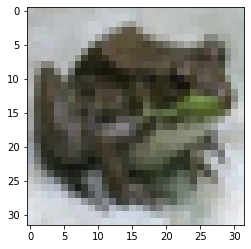

In [85]:
plt.imshow(X_train[7])

In [86]:
y_train[7]

6

In [14]:
classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [16]:
classes[y_train[0]]

'frog'

In [19]:
#defining the function
def plt_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

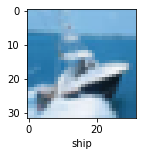

In [23]:
plt_sample(X_train,y_train,8)

In [24]:
#To normalize we divide the train image pixes by 255
X_train=X_train/255
X_test=X_test/255

In [30]:
#LETS first try trianing the ANN on image classifier and try comparing it with cnn
#model trianing (ANN)
from tensorflow import keras
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(1000,activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation='sigmoid')
])

In [33]:
ann.compile(optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

C:\Users\SHRAVNI SHETTY\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
ann.fit(X_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 142s 86ms/step - loss: 2.3794 - accuracy: 0.2517
Epoch 2/7
1563/1563 [==============================] - 138s 88ms/step - loss: 1.9341 - accuracy: 0.3154s - los
Epoch 3/7
1563/1563 [==============================] - 137s 88ms/step - loss: 1.8468 - accuracy: 0.3490
Epoch 4/7
1563/1563 [==============================] - 126s 81ms/step - loss: 1.8026 - accuracy: 0.3684
Epoch 5/7
1563/1563 [==============================] - 134s 86ms/step - loss: 1.7335 - accuracy: 0.3905
Epoch 6/7
1563/1563 [==============================] - 137s 88ms/step - loss: 1.7107 - accuracy: 0.4028
Epoch 7/7
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6648 - accuracy: 0.4214


In [35]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.7223 - accuracy: 0.4167


[1.7223395109176636, 0.41670000553131104]

# model building with CNN

In [40]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [41]:
cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train)

In [44]:
cnn.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid))

Epoch 1/15
1172/1172 [==============================] - 34s 28ms/step - loss: 1.6720 - accuracy: 0.3801 - val_loss: 1.4619 - val_accuracy: 0.4778
Epoch 2/15
1172/1172 [==============================] - 32s 27ms/step - loss: 1.3268 - accuracy: 0.5190 - val_loss: 1.2272 - val_accuracy: 0.5574
Epoch 3/15
1172/1172 [==============================] - 31s 27ms/step - loss: 1.1888 - accuracy: 0.5738 - val_loss: 1.2000 - val_accuracy: 0.5712
Epoch 4/15
1172/1172 [==============================] - 32s 27ms/step - loss: 1.0992 - accuracy: 0.6089 - val_loss: 1.1129 - val_accuracy: 0.6071
Epoch 5/15
1172/1172 [==============================] - 32s 27ms/step - loss: 1.0344 - accuracy: 0.6331 - val_loss: 1.0874 - val_accuracy: 0.6121
Epoch 6/15
1172/1172 [==============================] - 33s 28ms/step - loss: 0.9809 - accuracy: 0.6520 - val_loss: 1.0491 - val_accuracy: 0.6309
Epoch 7/15
1172/1172 [==============================] - 34s 29ms/step - loss: 0.9286 - accuracy: 0.6714 - val_loss: 1.1072 -

In [45]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0591 - accuracy: 0.6611


[1.059061050415039, 0.6610999703407288]

In [46]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [54]:
y_test[:5].reshape(-1,)

array([3, 8, 8, 0, 6], dtype=uint8)

In [49]:
y_test=y_test.reshape(-1,)

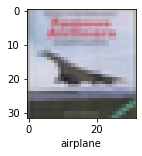

In [53]:
plt_sample(X_test,y_test,3)